In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway

In [2]:
df = pd.read_csv("/content/NCRB-2021_Table_19B.5.csv")
df

,Sl. No.,Crime Head,Persons Arrested - Male,Persons Arrested - Female,Persons Arrested - Transgender,Persons Arrested - Total,Persons Chargesheeted - Male,Persons Chargesheeted - Female,Persons Chargesheeted - Transgender,Persons Chargesheeted - Total,...,Persons Convicted - Transgender,Persons Convicted - Total,Persons Discharged - Male,Persons Discharged - Female,Persons Discharged - Transgender,Persons Discharged - Total,Persons Acquitted - Male,Persons Acquitted - Female,Persons Acquitted - Transgender,Persons Acquitted - Total
0,1,Murder,4907,178,2,5087,3950,141,2,4093,...,0,466,16,0,0,16,592,29,0,621
1,2,Culpable Homicide not amounting to Murder,385,12,0,397,333,9,0,342,...,0,44,4,0,0,4,53,0,0,53
2,3,Causing Death by Negligence,6261,160,0,6421,6202,154,0,6356,...,0,1165,61,0,0,61,1184,14,0,1198
3,3.1,Deaths due to Negligence relating to Road Acci...,5177,150,0,5327,5208,143,0,5351,...,0,818,58,0,0,58,734,11,0,745
4,3.1.1,Hit and Run,1880,43,0,1923,1875,37,0,1912,...,0,360,6,0,0,6,264,6,0,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,53,Criminal Intimidation,6332,1137,2,7471,9839,1124,2,10965,...,0,141,2,0,0,2,1708,187,0,1895
138,54,Insult to the Modesty of Women,1756,71,0,1827,1790,54,0,1844,...,0,33,14,0,0,14,82,6,0,88
139,Miscellaneous IPC Crimes(Total),Miscellaneous IPC Crimes(Total),147359,7580,2,154941,185021,9459,2,194482,...,0,71272,11541,67,0,11608,27905,1608,0,29513
140,55,Other IPC crimes,84152,1237,1,85390,46346,739,1,47086,...,0,6006,3051,2,0,3053,6147,121,0,6268


In [3]:
df.isna().any()

Sl. No.                                False
Crime Head                             False
Persons Arrested - Male                False
Persons Arrested - Female              False
Persons Arrested - Transgender         False
Persons Arrested - Total               False
Persons Chargesheeted - Male           False
Persons Chargesheeted - Female         False
Persons Chargesheeted - Transgender    False
Persons Chargesheeted - Total          False
Persons Convicted - Male               False
Persons Convicted - Female             False
Persons Convicted - Transgender        False
Persons Convicted - Total              False
Persons Discharged - Male              False
Persons Discharged - Female            False
Persons Discharged - Transgender       False
Persons Discharged - Total             False
Persons Acquitted - Male               False
Persons Acquitted - Female             False
Persons Acquitted - Transgender        False
Persons Acquitted - Total              False
dtype: boo

In [4]:
df['Crime Head'][:10]

0                                               Murder
1            Culpable Homicide not amounting to Murder
2                          Causing Death by Negligence
3    Deaths due to Negligence relating to Road Acci...
4                                          Hit and Run
5                                      Other Accidents
6    Deaths due to Negligence relating to Rail Acci...
7                     Deaths due to Medical Negligence
8             Deaths due to Negligence of Civic Bodies
9                       Deaths due to other Negligence
Name: Crime Head, dtype: object

In [5]:
print(df['Crime Head'])

0                                                 Murder
1              Culpable Homicide not amounting to Murder
2                            Causing Death by Negligence
3      Deaths due to Negligence relating to Road Acci...
4                                            Hit and Run
                             ...                        
137                                Criminal Intimidation
138                       Insult to the Modesty of Women
139                      Miscellaneous IPC Crimes(Total)
140                                     Other IPC crimes
141                          Total Cognizable IPC crimes
Name: Crime Head, Length: 142, dtype: object


In [6]:

# Define the arrays for multi-indexing
arrays = [
    ["Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Trans", "Trans", "Trans","Trans", "Trans", "Total","Total", "Total","Total", "Total"],
    ["Persons Arrested - Male", "Persons Chargesheeted - Male", "Persons Convicted - Male","Persons Discharged - Male", "Persons Acquitted - Male",
     "Persons Arrested - Female", "Persons Chargesheeted - Female", "Persons Convicted - Female","Persons Discharged - Female", "Persons Acquitted - Female",
     "Persons Arrested - Transgender", "Persons Chargesheeted - Transgender", "Persons Convicted - Transgender","Persons Discharged - Transgender", "Persons Acquitted - Transgender",
     "Persons Arrested - Total", "Persons Chargesheeted - Total", "Persons Convicted - Total","Persons Discharged - Total", "Persons Acquitted - Total",


     ]
]

# Create tuples from the arrays
tuples = list(zip(*arrays))

# Create a MultiIndex from the tuples
index = pd.MultiIndex.from_tuples(tuples, names=["Gender", "Category"])

# Create a new DataFrame with the MultiIndex
df_multi = pd.DataFrame(df.values[:, 2:], index=df.values[:, 0], columns=index)

df_multi

Gender                                             Male  \
Category                        Persons Arrested - Male   
1                                                  4907   
2                                                   385   
3                                                  6261   
3.1                                                5177   
3.1.1                                              1880   
...                                                 ...   
53                                                 6332   
54                                                 1756   
Miscellaneous IPC Crimes(Total)                  147359   
55                                                84152   
Total Cognizable IPC crimes                      491724   

Gender                                                        \
Category                        Persons Chargesheeted - Male   
1                                                        178   
2                                                         12   
3                                                        160   
3.1                                                      150   
3.1.1                                                     43   
...                                                      ...   
53                                                      1137   
54                                                        71   
Miscellaneous IPC Crimes(Total)                         7580   
55                                                      1237   
Total Cognizable IPC crimes                            24152   

Gender                                                    \
Category                        Persons Convicted - Male   
1                                                      2   
2                                                      0   
3                                                      0   
3.1                                                    0   
3.1.1                                                  0   
...                                                  ...   
53                                                     2   
54                                                     0   
Miscellaneous IPC Crimes(Total)                        2   
55                                                     1   
Total Cognizable IPC crimes                           50   

Gender                                                     \
Category                        Persons Discharged - Male   
1                                                    5087   
2                                                     397   
3                                                    6421   
3.1                                                  5327   
3.1.1                                                1923   
...                                                   ...   
53                                                   7471   
54                                                   1827   
Miscellaneous IPC Crimes(Total)                    154941   
55                                                  85390   
Total Cognizable IPC crimes                        515926   

Gender                                                    \
Category                        Persons Acquitted - Male   
1                                                   3950   
2                                                    333   
3                                                   6202   
3.1                                                 5208   
3.1.1                                               1875   
...                                                  ...   
53                                                  9839   
54                                                  1790   
Miscellaneous IPC Crimes(Total)                   185021   
55                                                 46346   
Total Cognizable IPC crimes                       434755   

Gender                                     

<Axes: >

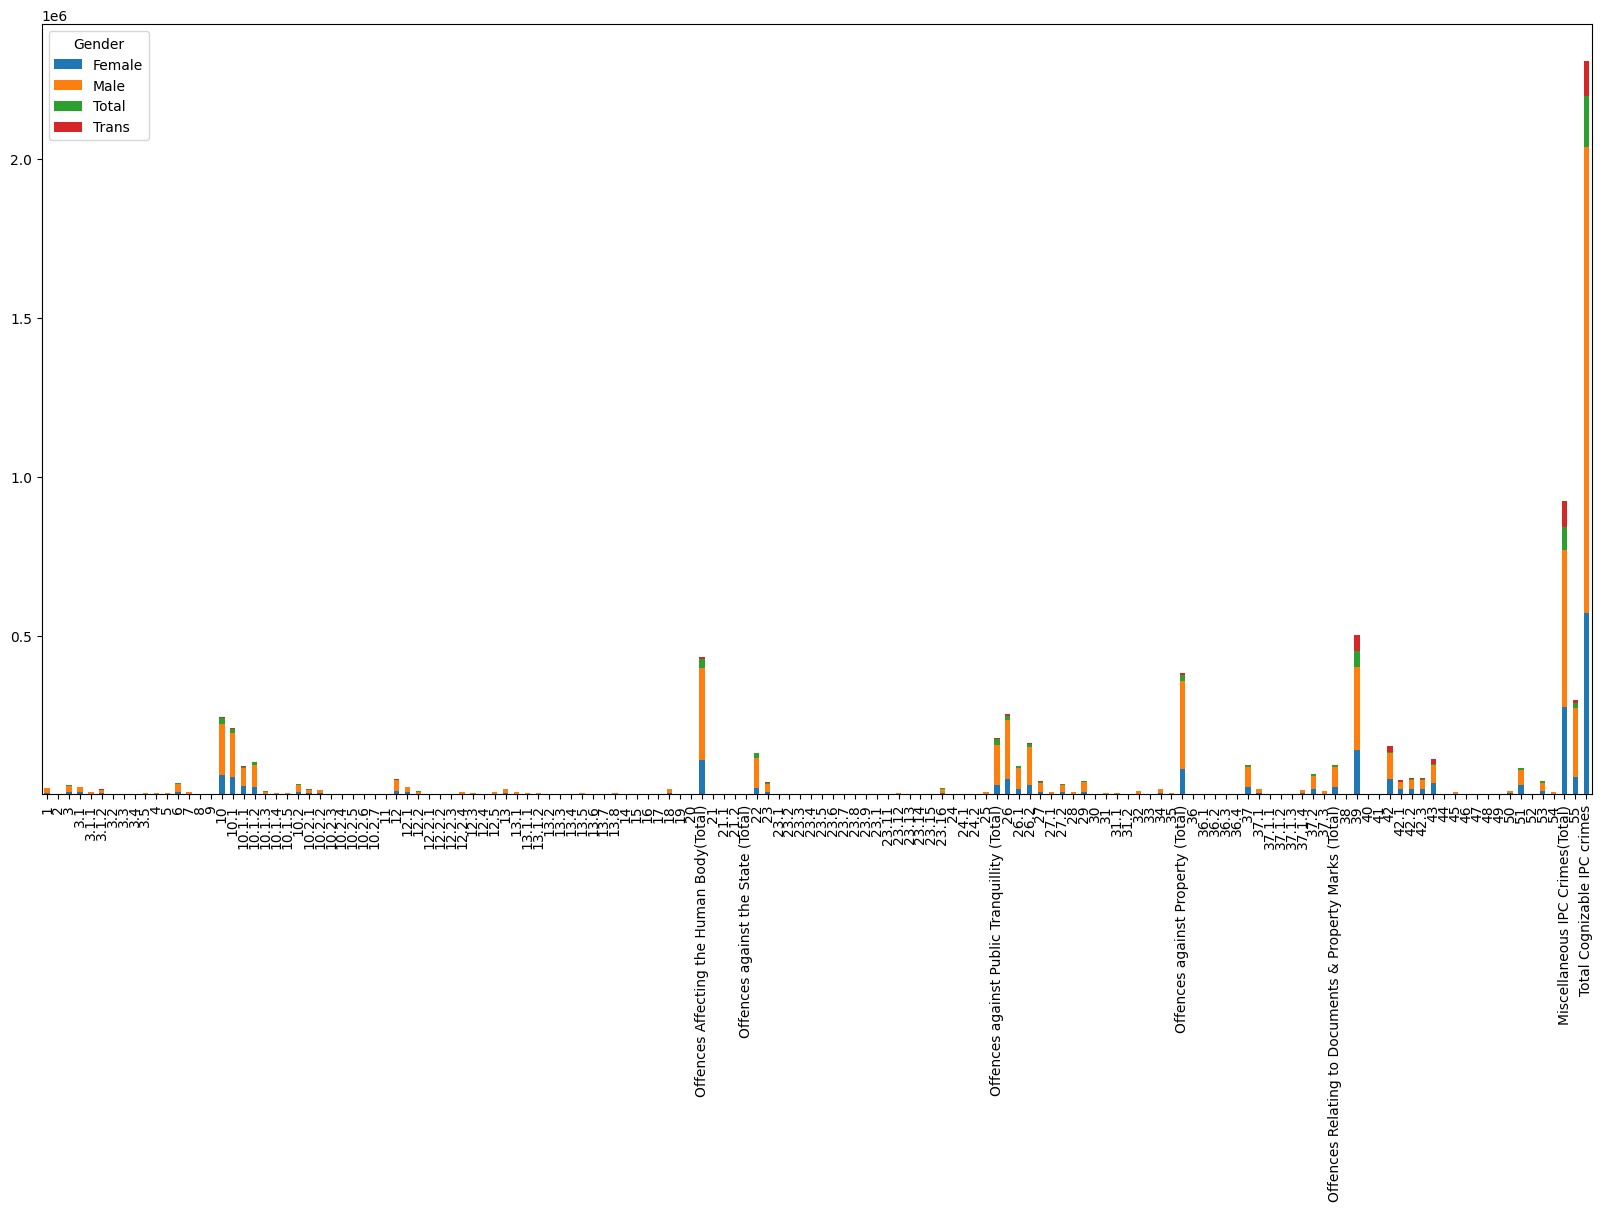

In [7]:
df_grouped = df_multi.groupby(level='Gender', axis=1).sum()

df_grouped.plot(kind='bar', stacked=True,figsize=(20, 10))

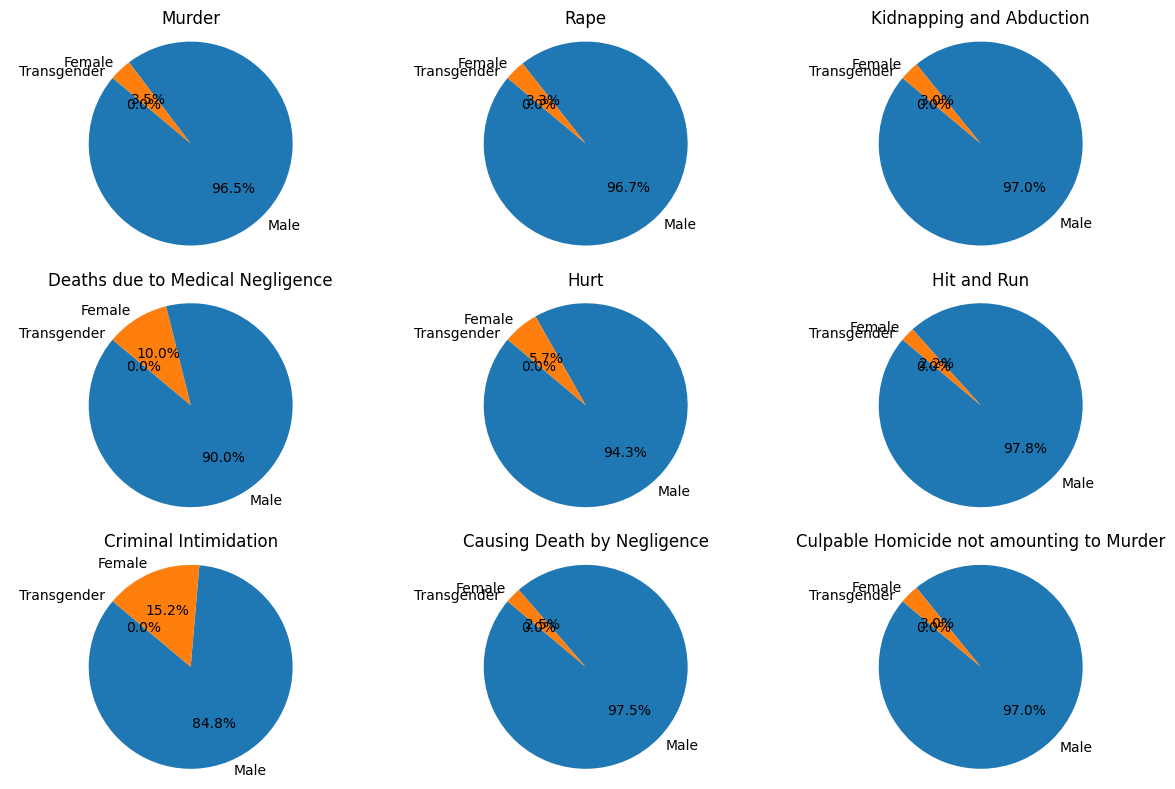

In [8]:
selected_crimes = ['Murder', 'Rape', 'Kidnapping and Abduction', 'Deaths due to Medical Negligence', 'Hurt',
                   'Hit and Run', 'Criminal Intimidation', 'Causing Death by Negligence', 'Culpable Homicide not amounting to Murder']

# Create pie charts for each selected crime
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, crime in enumerate(selected_crimes):
    row = i // 3
    col = i % 3

    crime_data = df[df['Crime Head'] == crime]

    # Calculate the total number of persons arrested by gender category
    male_arrested = crime_data['Persons Arrested - Male'].values[0]
    female_arrested = crime_data['Persons Arrested - Female'].values[0]
    transgender_arrested = crime_data['Persons Arrested - Transgender'].values[0]

    # Create a pie chart to visualize the distribution of persons arrested by gender category for the current crime
    labels = ['Male', 'Female', 'Transgender']
    sizes = [male_arrested, female_arrested, transgender_arrested]

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[row, col].set_title(f'{crime}')

plt.tight_layout()
plt.show()

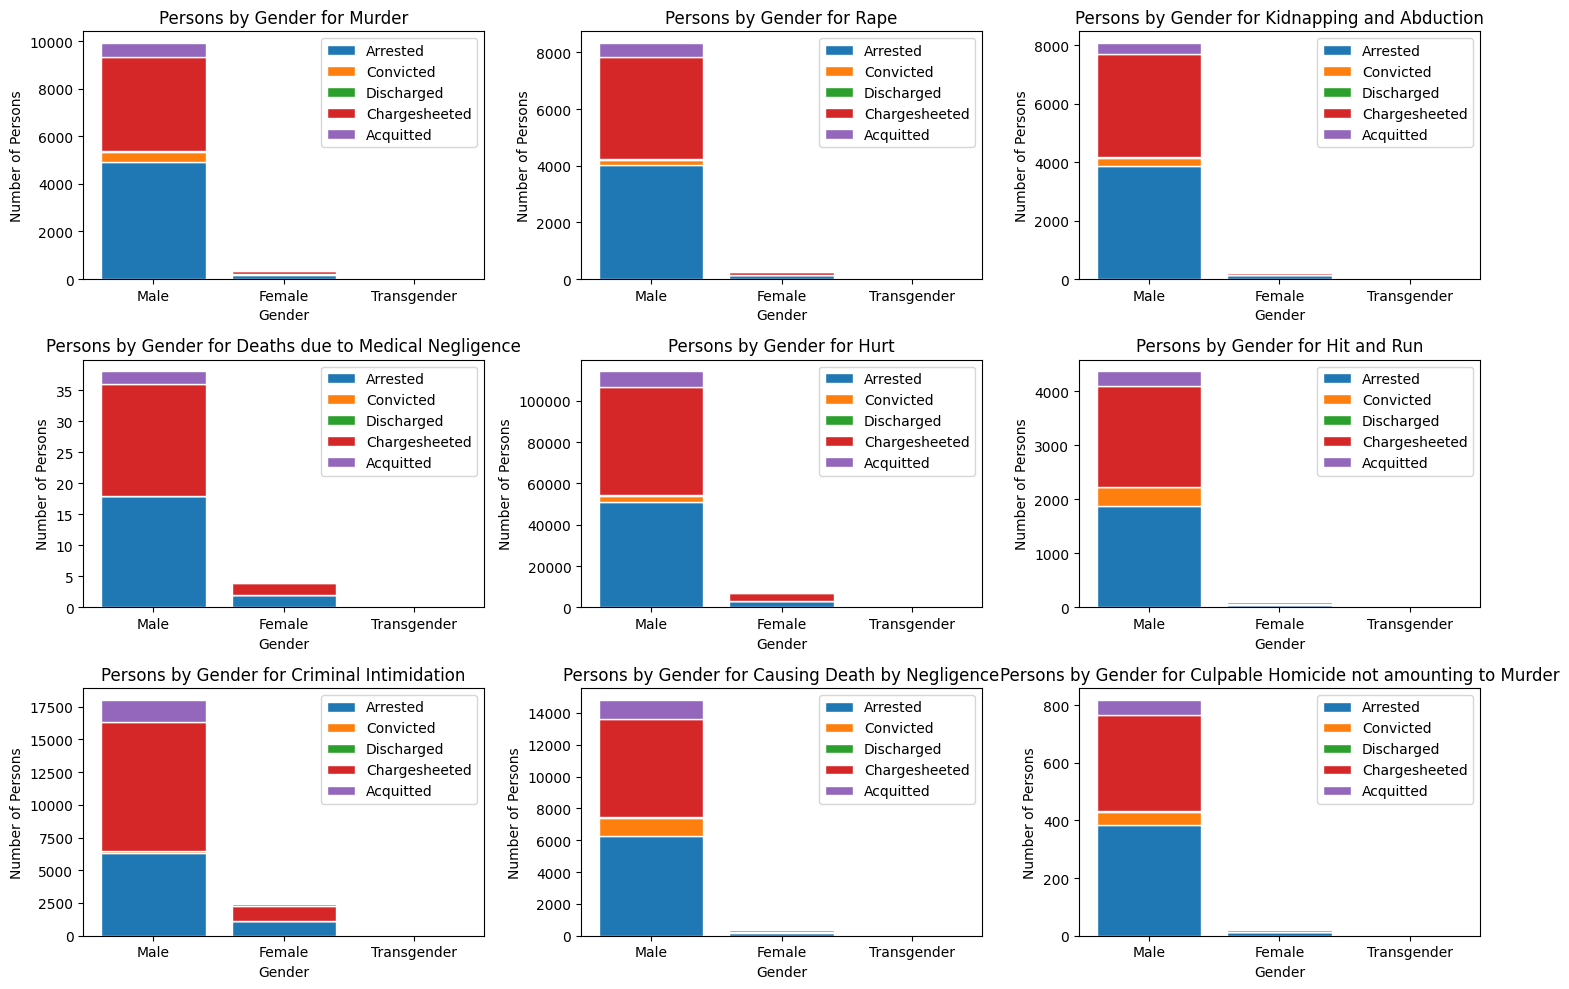

In [9]:
selected_crimes = ['Murder', 'Rape', 'Kidnapping and Abduction', 'Deaths due to Medical Negligence', 'Hurt',
                   'Hit and Run', 'Criminal Intimidation', 'Causing Death by Negligence', 'Culpable Homicide not amounting to Murder']

# Create subplots with stacked bar plots for each selected crime
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, crime in enumerate(selected_crimes):
    crime_data = df[df['Crime Head'] == crime]

    arrested = crime_data[['Persons Arrested - Male', 'Persons Arrested - Female', 'Persons Arrested - Transgender']]
    convicted = crime_data[['Persons Convicted - Male', 'Persons Convicted - Female', 'Persons Convicted - Transgender']]
    discharged = crime_data[['Persons Discharged - Male', 'Persons Discharged - Female', 'Persons Discharged - Transgender']]
    chargesheeted = crime_data[['Persons Chargesheeted - Male', 'Persons Chargesheeted - Female', 'Persons Chargesheeted - Transgender']]
    acquitted = crime_data[['Persons Acquitted - Male', 'Persons Acquitted - Female', 'Persons Acquitted - Transgender']]

    r = [0, 1, 2]
    barWidth = 0.8

    row = i // 3
    col = i % 3

    axs[row, col].bar(r, arrested.values[0], edgecolor='white', width=barWidth, label='Arrested')
    axs[row, col].bar(r, convicted.values[0], bottom=arrested.values[0], edgecolor='white', width=barWidth, label='Convicted')
    axs[row, col].bar(r, discharged.values[0], bottom=arrested.values[0] + convicted.values[0], edgecolor='white', width=barWidth, label='Discharged')
    axs[row, col].bar(r, chargesheeted.values[0], bottom=arrested.values[0] + convicted.values[0] + discharged.values[0], edgecolor='white', width=barWidth, label='Chargesheeted')
    axs[row, col].bar(r, acquitted.values[0], bottom=arrested.values[0] + convicted.values[0] + discharged.values[0] + chargesheeted.values[0], edgecolor='white', width=barWidth, label='Acquitted')

    axs[row, col].set_xlabel('Gender')
    axs[row, col].set_xticks(r)
    axs[row, col].set_xticklabels(['Male', 'Female', 'Transgender'])
    axs[row, col].set_ylabel('Number of Persons')
    axs[row, col].set_title(f'Persons by Gender for {crime}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [26]:
# Descriptive statistics for each category
for gender in df_multi.columns.levels[0]:
    for category in df_multi.columns.levels[1]:
        if (gender, category) in df_multi.columns:
            print(f"Descriptive statistics for {gender}, {category}:")
            print(df_multi[gender, category].describe())
            print("\n")


Descriptive statistics for Female, Persons Acquitted - Female:
count     142
unique     38
top         0
freq       86
Name: (Female, Persons Acquitted - Female), dtype: int64


Descriptive statistics for Female, Persons Arrested - Female:
count      142.000000
mean       540.338028
std       2176.335937
min          0.000000
25%          1.000000
50%         18.500000
75%        126.500000
max      21909.000000
Name: (Female, Persons Arrested - Female), dtype: float64


Descriptive statistics for Female, Persons Chargesheeted - Female:
count     142
unique     10
top         0
freq      120
Name: (Female, Persons Chargesheeted - Female), dtype: int64


Descriptive statistics for Female, Persons Convicted - Female:
count     142
unique    134
top         7
freq        3
Name: (Female, Persons Convicted - Female), dtype: int64


Descriptive statistics for Female, Persons Discharged - Female:
count     142
unique     94
top         0
freq       27
Name: (Female, Persons Discharged - Fema

In [14]:
from scipy import stats
# For t-test, let's assume we are comparing 'Persons Arrested - Male' and 'Persons Arrested - Female'
male_arrested = df_multi[('Male', 'Persons Arrested - Male')]
female_arrested = df_multi[('Female', 'Persons Arrested - Female')]

t_stat, p_val = stats.ttest_ind(male_arrested, female_arrested)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 2.895978891030746, P-value: 0.004075654228566588


In [25]:
import scipy.stats as stats

# Perform ANOVA for each gender
for gender in df_multi.columns.levels[0]:  # Iterate over the first level of the MultiIndex (Gender)
    # Get the data for each category
    data = [df_multi[gender, category] for category in df_multi.columns.levels[1] if (gender, category) in df_multi.columns]

    # Perform the ANOVA
    f_val, p_val = stats.f_oneway(*data)

    print(f"Results for {gender}:")
    print(f"F-value: {f_val}")
    print(f"P-value: {p_val}\n")


Results for Female:
F-value: 7.934030846412682
P-value: 2.939652709738317e-06

Results for Male:
F-value: 4.411572902728004
P-value: 0.0015774151507381828

Results for Total:
F-value: 5.311948716397922
P-value: 0.0003219904317692303

Results for Trans:
F-value: 5.488998859915462
P-value: 0.00023509502400086978

